# BANK NOTE AUTHENTICATION

### Data Source:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de) 
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de) 
Date received: August, 2012 

Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 


### Objective:

> To classify whether banknote is real or fake using Machine Learning Classification Algorithms with extracted features from images using Wavelet Transform Tool.



In [77]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score,euclidean_distances
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Load the dataset to Pandas DataFrame

In [4]:
banknote_data=pd.read_csv('BankNote_Authentication.csv')

In [5]:
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Descriptive Statistics

In [6]:
banknote_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Checking for N/A values in dataset

In [7]:
banknote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


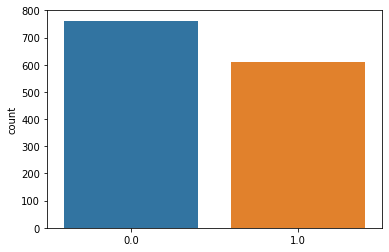

In [79]:
sns.countplot(banknote_data.values[:,-1]);

Around 44% banknotes are real in the dataset.



## Import the data

In [10]:
X = banknote_data.values[:,:-1]
y = banknote_data.values[:,-1]

In [11]:
banknote_data.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


# CLASSIFICATION

## Scaling the data

In [13]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## train/test split the data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=12)

## K Nearest Neighbors (KNN)

#### Initially trying with neighbour = 5

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The training accuracy for K=5 is {}".format(accuracy_score(y_train,knn.predict(X_train))))
print("The testing accuracy for K=5 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K=5 is 0.9963547995139733
The testing accuracy for K=5 is 0.9836065573770492


## Determining best number of neighbours for KNN

In [16]:
scores = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [17]:
for i,s in enumerate(scores):
    print(i+1,s)

1 0.9981785063752276
2 0.9981785063752276
3 0.9981785063752276
4 0.9981785063752276
5 0.9836065573770492
6 0.9854280510018215
7 0.9854280510018215
8 0.9854280510018215
9 0.9854280510018215
10 0.9854280510018215
11 0.9854280510018215
12 0.9854280510018215
13 0.9854280510018215
14 0.9854280510018215
15 0.9854280510018215
16 0.9854280510018215
17 0.9836065573770492
18 0.9854280510018215
19 0.9854280510018215
20 0.9854280510018215
21 0.9836065573770492
22 0.9836065573770492
23 0.9836065573770492
24 0.9854280510018215
25 0.9836065573770492


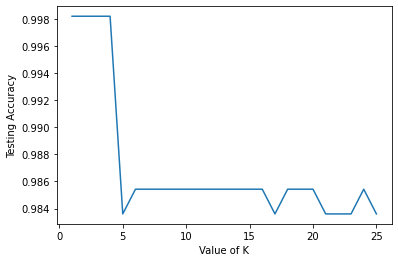

In [18]:
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy');

** From above plot, we find the best number of neighbours are between 1 and 4 because testing accuracy is about 99.81% for this neighbours. But we choose neighbours to be 4 because it is less complex. **

## Fitting model best value of neighbours

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The training accuracy for K=4 is {}".format(accuracy_score(y_train,knn.predict(X_train))))
print("The testing accuracy for K=4 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K=4 is 0.9987849331713244
The testing accuracy for K=4 is 0.9981785063752276


In [20]:
from sklearn.metrics import confusion_matrix, roc_curve

## Confusion matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[300,   1],
       [  0, 248]], dtype=int64)

## ROC curve

In [22]:
threshold = 0.4
scores = knn.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.         0.00332226 0.02990033 1.        ] [0. 1. 1. 1. 1.]


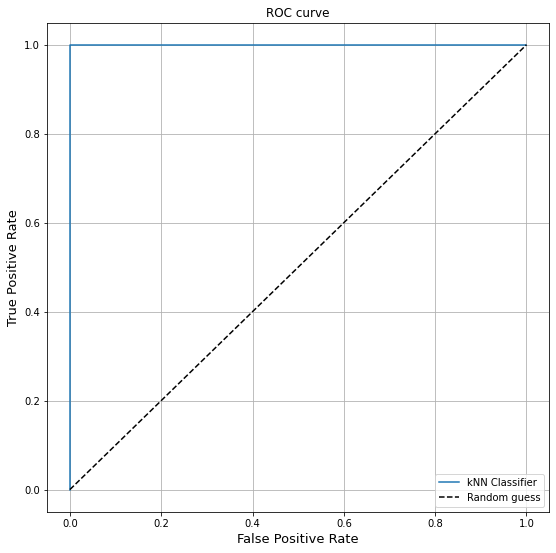

In [23]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='kNN Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

** From the above plot, you can see blue line which touches the margin which tells us our model is good **

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [26]:
print("Accuracy for Training Data is {} ".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy for Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for Training Data is 0.9878493317132442 
Accuracy for Testing Data is 0.9726775956284153 


## Confusion matrix¶

In [27]:
confusion_matrix(y_test,y_pred)

array([[287,  14],
       [  1, 247]], dtype=int64)

## ROC curve


In [28]:
threshold = 0.4
scores = logreg.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.         0.         0.00332226 0.01328904 0.0166113
 0.0166113  0.02325581 0.03322259 0.03322259 0.03654485 0.04651163
 0.04651163 0.04983389 0.06312292 1.        ] [0.         0.00403226 0.98387097 0.98387097 0.98387097 0.98387097
 0.99193548 0.99193548 0.99193548 0.99596774 0.99596774 0.99596774
 1.         1.         1.         1.        ]


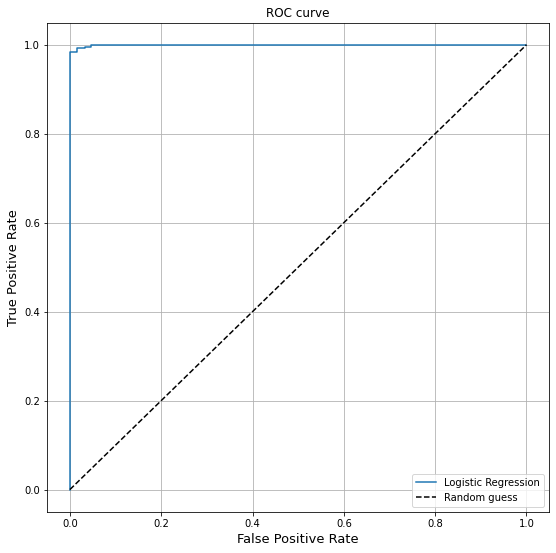

In [32]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

** From the above plot, we see the blue curve to be close to margins which tells us that our model is good. **

# DecisionTree Classifier

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Accuracy Scores


In [33]:
print("Accuracy for DecisionTreeClassifier Training Data is {} ".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy for DecisionTreeClassifier Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for DecisionTreeClassifier Training Data is 0.9878493317132442 
Accuracy for DecisionTreeClassifier Testing Data is 0.9836065573770492 


In [34]:
cross_val_score(clf, X, y, cv=10, scoring="accuracy").mean()

0.9839627631439756

## Confusion Matrix

In [35]:
threshold = 0.4
scores = clf.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.        0.0166113 1.       ] [0.         0.98387097 1.        ]


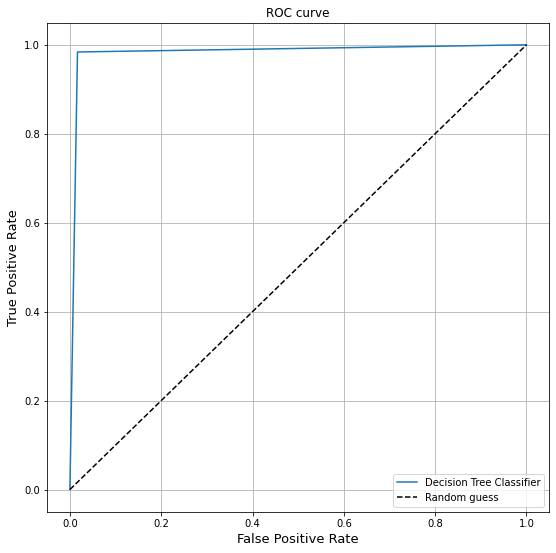

In [36]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Decision Tree Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=10000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [39]:
print("Accuracy for RandomForestClassifier Training Data is {} ".format(accuracy_score(y_train,rf.predict(X_train))))
print("Accuracy for RandomForestClassifier Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for RandomForestClassifier Training Data is 1.0 
Accuracy for RandomForestClassifier Testing Data is 0.994535519125683 


# Gradient Boosting Classifier

In [40]:
def stage_score_plot(params, X_train, y_train, X_test, y_test):
    # instantiate the class
    clf = GradientBoostingClassifier(**params)
    # fit the model
    clf.fit(X_train, y_train)
    
    # compute train and test set deviance
    train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf.staged_predict(X_train)):
        train_score[i] = 1 - accuracy_score(y_train,y_pred)

    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = 1 - accuracy_score(y_test,y_pred)


    # plot the num_iterations and MSE for both train and test score
    plt.plot(np.arange(params['n_estimators']) + 1, train_score,
             label=" ".join(['GradientBoosting Train - learning rate',str(params['learning_rate'])]))
    plt.plot(np.arange(params['n_estimators']) + 1, test_score,
             label=" ".join(['GradientBoosting Test - learning rate',str(params['learning_rate'])]))
    
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Error')

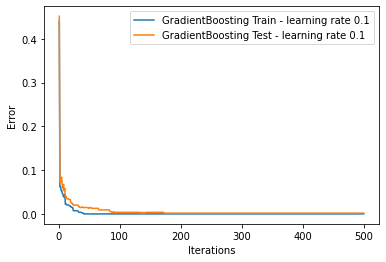

In [41]:
params = {'n_estimators': 500, 
          'learning_rate': 0.1}
stage_score_plot(params, X_train, y_train, X_test, y_test) 
plt.show()

## stage_score_plot function to make a plot that shows the error for gradient boosting with a learning rate of 0.1 and 1.

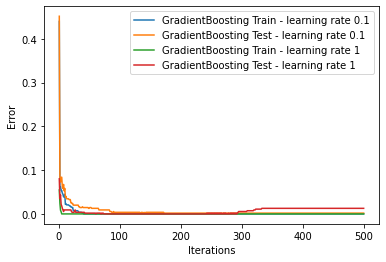

In [42]:
params_01 = {'n_estimators': 500, 
          'learning_rate': 0.1}
params_1 = {'n_estimators': 500, 
          'learning_rate': 1}
plt.figure()
stage_score_plot(params_01, X_train, y_train, X_test, y_test)    
stage_score_plot(params_1, X_train, y_train, X_test, y_test)    

plt.show()

## Use GridSearchCV for to find the best RandomForestClassifier

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1, 2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [100, 500],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.94774575 0.95016999 0.94774575 0.95016999
        nan        nan 0.94774575 0.94895787 0.94774575 0.94895787
        nan        nan 0.94895787 0.95017738 0.94895787 0.95017738
        nan        nan 0.94774575 0.95016999 0.94774575 0.95016999
        nan        nan 0.94774575 0.94895787 0.94774575 0.94895787
        nan        nan 0.94895787 0.95017738 0.94895787 0.95017738
        nan        nan 0.93923134 0.93801183 0.93923134 0.93801183
        nan        nan 0.93801183 0.93679231 0.93801183 0.93679231
        nan        nan 0.9367997  0.93558019 0.9367997  0.93558019
        nan        nan 0.99271249 0.99149298 0.99149298 0.99149298
        nan        nan 0.99027347 0.98783444 0.99027347 0.98783444
        nan        nan 0.99027347 0.98783444 0.99027347 0.98783444
        nan        na

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 500], 'random_state': [1]},
             scoring='accuracy', verbose=True)

## Fitting the model with best parameters obtained by GridSearchCV on RandomForestClassifier

In [45]:
print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
best_rf_model.fit(X_train,y_train)

best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}


RandomForestClassifier(max_features='sqrt', random_state=1)

## Accuracy for RandomForestClassifier

In [46]:
print("Random Forest Testing Accuracy Score: {} ".format(best_rf_model.score(X_test,y_test)))

Random Forest Testing Accuracy Score: 0.9963570127504554 


## Confusion Matrix

In [47]:
y_pred = best_rf_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[299,   2],
       [  0, 248]], dtype=int64)

## ROC Curve

In [48]:
threshold = 0.4
scores = best_rf_model.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00664452 0.00664452 0.0166113
 0.02990033 0.03322259 0.03986711 0.05315615 0.0730897  0.08637874
 0.09966777 0.11627907 0.12624585 0.12956811 0.1461794  0.17607973
 0.22591362 0.29900332 0.43189369 1.        ] [0.         0.45967742 0.64112903 0.72177419 0.77016129 0.83870968
 0.85080645 0.87096774 0.88709677 0.91129032 0.92741935 0.93951613
 0.94354839 0.96774194 0.99193548 0.99193548 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


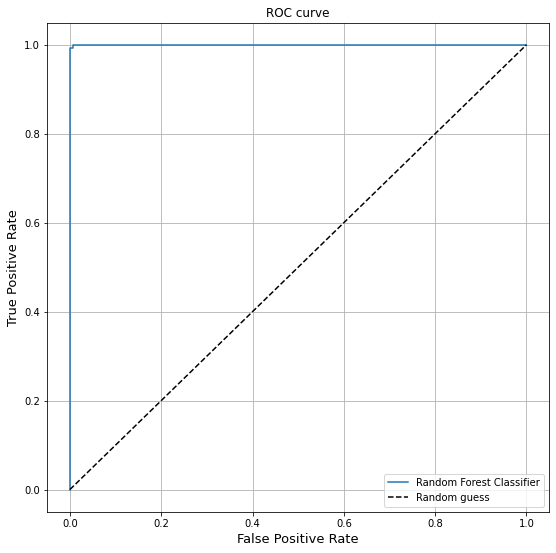

In [49]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

## Use GridSearchCV for to find the best GradientBoostingClassifier

In [51]:
gradient_boost_grid = {'learning_rate':[0.05, 0.02, 0.01],
                       'max_depth':[4, 5, 6, 7],
                       'min_samples_leaf':[7, 9, 13],
                       'max_features':['auto'],
                       'n_estimators':[100,500]}

gradient_boost_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
gradient_boost_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.02, 0.01],
                         'max_depth': [4, 5, 6, 7], 'max_features': ['auto'],
                         'min_samples_leaf': [7, 9, 13],
                         'n_estimators': [100, 500]},
             scoring='accuracy', verbose=True)

## Fitting the model with best parameters obtained by GridSearchCV on GradientBoostingClassifier

In [52]:
print("best parameters:", gradient_boost_gridsearch.best_params_)

best_gradient_boost_model = gradient_boost_gridsearch.best_estimator_
best_gradient_boost_model.fit(X_train,y_train)

best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 13, 'n_estimators': 500}


GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='auto',
                           min_samples_leaf=13, n_estimators=500)

## Accuracy for GradientBoostingClassifier

In [53]:
print("Gradient Boosting Accuracy Score: {} ".format(best_gradient_boost_model.score(X_test,y_test)))

Gradient Boosting Accuracy Score: 0.9981785063752276 


## Confusion Matrix

In [54]:
y_pred = best_gradient_boost_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[300,   1],
       [  0, 248]], dtype=int64)

## ROC Curve

In [55]:
threshold = 0.4
scores = best_gradient_boost_model.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05980066 0.0730897  0.07973422
 0.09302326 0.11295681 0.12624585 0.16943522 0.17607973 0.18936877
 0.19601329 0.2192691  0.22591362 0.24252492 0.24916944 0.27242525
 0.27906977 0.3255814  0.33222591 0.3820598  0.38870432 1.        ] [0.         0.00403226 0.05645161 0.06451613 0.49596774 0.50403226
 0.56854839 0.5766129  0.69354839 0.7016129  0.74193548 0.75
 0.85887097 0.86693548 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


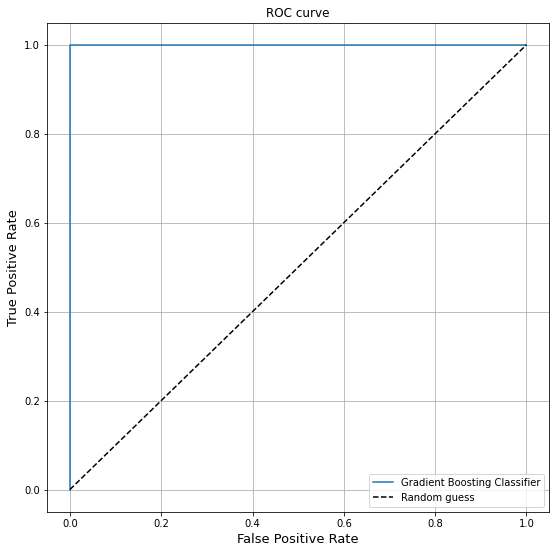

In [56]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Gradient Boosting Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

## From above ensemble methods, we see that GradientBoostingClassifer gives us better accuracy results than RandomForestClassifier and DecisionTreeClassifier.

# Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

## Bernoulli Naive Bayes

In [58]:
sk_bb = BernoulliNB()
sk_bb.fit(X_train,y_train)
acc = cross_val_score(sk_bb, X, y, cv=10, scoring="accuracy")
print("Bernoulli Accuracy: ", np.mean(acc))

Bernoulli Accuracy:  0.8440071934835502


## Confusion Matrix


In [59]:
y_pred = sk_bb.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[244,  57],
       [ 26, 222]], dtype=int64)

## ROC Curve

In [60]:
threshold = 0.4
scores = sk_bb.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.00664452 0.04318937 0.04318937 0.05647841 0.10963455
 0.12292359 0.17940199 0.18936877 0.19269103 0.45182724 0.51827243
 0.52159468 0.56478405 0.77740864 1.        ] [0.         0.06451613 0.41129032 0.43548387 0.61693548 0.61693548
 0.61693548 0.85887097 0.89516129 0.89516129 0.89919355 0.9233871
 0.9233871  0.9233871  0.98790323 1.        ]


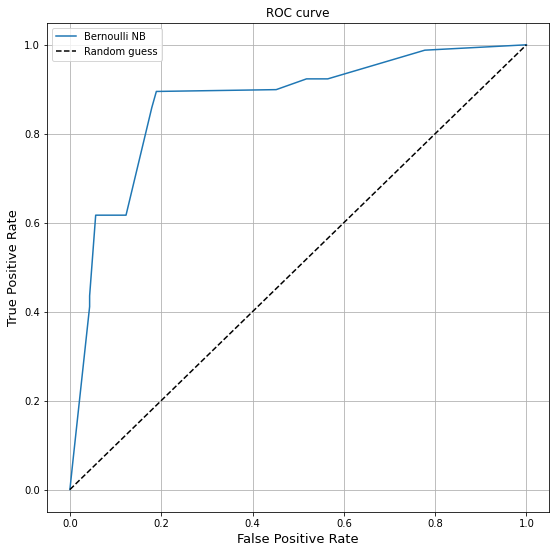

In [61]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Bernoulli NB')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

# SVM Classifier


In [62]:
## helper functions

In [63]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [64]:
from sklearn.svm import SVC

In [65]:
X_train = X_train[:,:2]
X_test = X_test[:,:2]
SVM = SVC()
SVM.fit(X_train,y_train)

SVC()

In [66]:
accuracy_score(SVM.predict(X_test),y_test)

0.912568306010929

c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


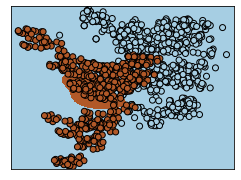

In [67]:
decision_boundary(SVM, X[:,:2],y)

## Using GridSearchCV to find best parameters for SVC

In [68]:
svm_grid = {'kernel':['rbf','poly','linear'],
                       'C':[4, 5, 6,10],
                       'gamma':['auto']}

svm_gridsearch = GridSearchCV(SVC(),
                             svm_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
svm_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [4, 5, 6, 10], 'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy', verbose=True)

In [69]:
print("best parameters:", svm_gridsearch.best_params_)

best_svm_model = svm_gridsearch.best_estimator_
best_svm_model.fit(X_train,y_train)

best parameters: {'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=6, gamma='auto')

In [70]:
accuracy_score(best_svm_model.predict(X_test),y_test)

0.930783242258652

c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


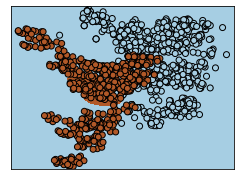

In [71]:
decision_boundary(best_svm_model,X[:,:2],y)

## Confusion Matrix

In [72]:
y_pred = best_svm_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[268,  33],
       [  5, 243]], dtype=int64)

## ROC Curve

In [74]:
threshold = 0.4
scores = best_svm_model.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[0.         0.         0.         0.00332226 0.00332226 0.00664452
 0.00664452 0.00996678 0.00996678 0.01328904 0.01328904 0.0166113
 0.0166113  0.01993355 0.01993355 0.02990033 0.03322259 0.03322259
 0.03654485 0.03654485 0.03986711 0.03986711 0.04318937 0.04318937
 0.04651163 0.04651163 0.04983389 0.04983389 0.05315615 0.05315615
 0.05647841 0.05647841 0.06644518 0.06976744 0.06976744 0.07973422
 0.07973422 0.08305648 0.08305648 0.09634551 0.09634551 0.10631229
 0.10631229 0.10963455 0.10963455 0.12956811 0.13953488 0.1461794
 0.1461794  0.15282392 0.15282392 0.15946844 0.15946844 0.16943522
 0.16943522 0.19269103 0.19933555 0.22259136 0.22259136 0.26578073
 0.27242525 1.        ] [0.         0.00403226 0.33064516 0.33064516 0.33870968 0.33870968
 0.35887097 0.35887097 0.47580645 0.47580645 0.49193548 0.49193548
 0.52016129 0.52016129 0.64919355 0.64919355 0.64919355 0.68548387
 0.68548387 0.7016129  0.7016129  0.72580645 0.72580645 0.74193548
 0.74193548 0.85483871 0.85483871 0.8911

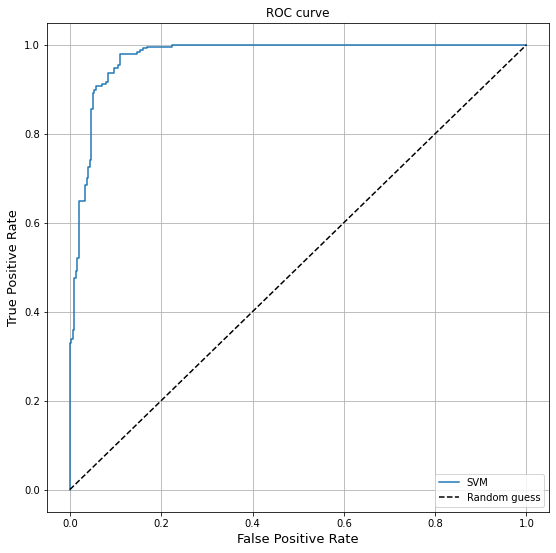

In [75]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='SVM')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

# Conclusion

Models - Accuracy 

KNN - 0.9981785063752276

Logistic Regression - 0.9726775956284153

Decision Tree Classifier - 0.98249761980323724

Random Forest Classifier - 0.9963570127504554

Gradient Boosting Classifier - 0.9908925318761385

Bernoulli NB - 0.844007193484

SVC - 0.93078324225865205

# ** We can see from above results, KNN works best for classification of real and fake bank notes **